# CatBoost Step 1. CatBoostClassifier

In [1]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

I use the popular Titanic database.

In [2]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/tit_train.csv')
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Quick cleaning and removal of columns

In [3]:
df.drop(['PassengerId','Unnamed: 0', 'Cabin','Name','Ticket'], axis=1, inplace=True)

## Select all discrete columns and convert them into discrete data in bulk

In [4]:
blue(df.dtypes)
df = df.dropna(how='any')
gray(df.isnull().sum())
green(df.shape)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(712, 8)


In [5]:
X = df.drop('Survived', axis=1) 
y = df['Survived']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

# CatBoostClassifier - First model

In [6]:
from catboost import CatBoostClassifier, Pool
# Initialize CatBoostClassifier
model_CB1 = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

Model parameters:

- custom_loss - Metric used during the training, selected: ['Accuracy']
    https://catboost.ai/docs/search/?query=%27Accuracy%27
- random_seed = 42 The random seed used for training. That random values are the same every time.
- logging_level = 'Silent' Log in level to exit to standard output. 'Silent' - do not send any login information to the standard output. 'Verbose' - send the following data to the standard output, then it shows in model.fit all the learning path. 'Info' or 'Debug' - displaying additional information and the number of trees.


Two new features are associated with the CatBoostClassifier model. This model needs to be split between categorical and numeric variables. This information is declared in the model in the cat_features manual. Column numbers containing categorical variables are provided there. This information must be in the model.
Another novelty: categorical variables, e.g. text, do not need to be coded because the algorithm will encode them into a digital format.

### A function that assigns variables to a set of categorical variables based on the number of unique values

In [7]:
import numpy as np

categorical_fuX = np.where(X_train.nunique() <8) [0]
categorical_fuX

array([0, 1, 3, 4, 6])

### Function that assigns variables to a set of categorical variables based on np.float

In [8]:
import numpy as np

categorical_ff = np.where(X_train.dtypes != np.float)[0]
categorical_ff

array([0, 1, 3, 4, 6])

In [9]:
X_train.columns[4]

'Parch'

### Model fit

In [10]:
cat_features = categorical_fuX

# Fit model
model_CB1.fit(X_train, y_train, cat_features)

In [11]:
# Get predicted classes
pred_y = model_CB1.predict(X_test)
blue(pred_y)

[0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1]


In [12]:
# Get predicted probabilities for each class
preds_proba = model_CB1.predict_proba(X_test)
blue(preds_proba[:6])

[[0.85263078 0.14736922]
 [0.83668927 0.16331073]
 [0.88530278 0.11469722]
 [0.0271033  0.9728967 ]
 [0.53206745 0.46793255]
 [0.05454385 0.94545615]]


Assuming that the goal is classification (0,1), then the classifier would derive the dimension probability matrix (N, 2). The first index refers to the probability that the data belongs to class 0, and the second index refers to the probability that the data belongs to class 1.

Both values in the line must give 1.

In [13]:
# Get predicted RawFormulaVal
pred_raw = model_CB1.predict(X_test, prediction_type='RawFormulaVal')
blue(pred_raw[:25])

[-1.75538548 -1.63379809 -2.04363396  3.58062234 -0.12844609  2.85266251
 -1.94092344  3.23063388 -2.02739665 -0.78200409 -1.8936431   1.79676921
 -1.69474646 -2.21282392 -0.42516321 -2.18014857  0.44380189 -1.64375843
 -1.9981667  -1.85581634 -2.07620424 -1.95036355 -2.12249651  1.27041272
  1.62970858]


The required prediction type.

 - prediction_type = 'Probability', probability for 0 and 1, which gives a total of 1 (e.g. [0.54761429 0.45238571])
 - prediction_type = 'Class', categorical values 0-1
 - prediction_type = 'RawFormulaVal', numeric values, continuous (when classifying, setting continuous values gives better model quality - I don't know why.

In [14]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest, y_pred):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print(classification_report(ytest, model.predict(Xtest)))
    
    y_pred_proba = model.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    auc = metrics.roc_auc_score(ytest, y_pred)
    plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
    plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
    plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()
    print('auc',auc)

Recall Training data:      0.1913
Precision Training data:   0.9565
----------------------------------------------------------------------
Recall Test data:          0.1207
Precision Test data:       0.875
----------------------------------------------------------------------
Confusion Matrix Test data
[[84  1]
 [51  7]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.99      0.76        85
           1       0.88      0.12      0.21        58

    accuracy                           0.64       143
   macro avg       0.75      0.55      0.49       143
weighted avg       0.72      0.64      0.54       143



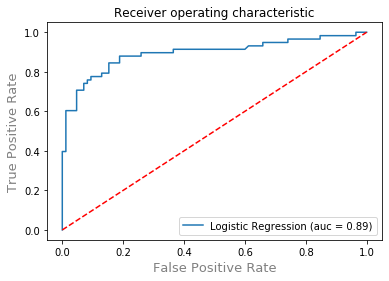

auc 0.8940162271805274


In [25]:
Classification_Assessment(model_CB1 ,X_train, y_train, X_test, y_test, pred_raw)

### # CatBoostClassifier - Secound model

In [16]:
from catboost import CatBoostRegressor

model_CB2 = CatBoostClassifier(iterations=2000,
                           learning_rate=1,
                           logging_level='Silent',
                           depth=2)

Iterations and learning rate
  - By default, CatBoost builds 1000 trees (iterations = 1000). The number of iterations can be reduced to speed up training. When the number of iterations decreases, the learning rate should be increased.
  - Reduce the learning rate if you observe over-matching.
 

In [17]:
cat_features = categorical_fuX

# Fit model
model_CB2.fit(X_train,  y_train, cat_features)

In [18]:
# Get predicted RawFormulaVal
pred_raw2 = model_CB2.predict(X_test, prediction_type='RawFormulaVal')
blue(pred_raw2[:25])

[-1.16704217  1.48566011 -0.74675383 10.50311507  4.01697576  6.02699475
 -2.78016881  6.66757517  2.29665968 -1.07726253 -4.84687783  5.98579841
  0.52268062 -3.32868989 -0.59928617 -6.08291549 -2.152742    2.3453906
 -0.01923405 -2.78393673  0.38571559 -1.51933139 -5.6825021   3.51415835
  2.01112103]


Recall Training data:      0.9087
Precision Training data:   0.8427
----------------------------------------------------------------------
Recall Test data:          0.7931
Precision Test data:       0.7419
----------------------------------------------------------------------
Confusion Matrix Test data
[[69 16]
 [12 46]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        85
           1       0.74      0.79      0.77        58

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.81      0.80      0.81       143



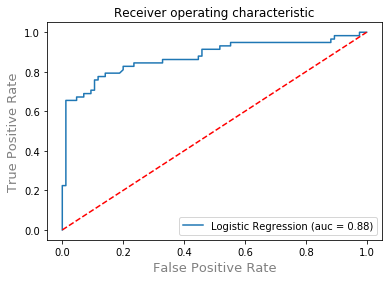

auc 0.8753549695740366


In [19]:
Classification_Assessment(model_CB2 ,X_train, y_train, X_test, y_test, pred_raw2)

## Comparison to the RandomForestClassifier model
This model is on steroids, so its execution time is long. 

First, however, you had to encode discrete variables in the srt format into a numeric value.

### Which variables have non-digital values?

In [20]:
import numpy as np

categorical_X_train = np.where(X_train.dtypes == np.object)[0]
categorical_X_train

categorical_X_test = np.where(X_test.dtypes == np.object)[0]
categorical_X_test

array([1, 6])

In [21]:
kot = X_train.columns[categorical_X_train]
blue(kot)
kot2 = X_test.columns[categorical_X_test]
green(kot2)

Index(['Sex', 'Embarked'], dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder

X_train[kot] = X_train[kot].apply(LabelEncoder().fit_transform)
X_test[kot2] = X_test[kot2].apply(LabelEncoder().fit_transform)

X_train.head()

/home/wojciech/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
91,3,1,20.0,0,0,7.8542,2
390,1,1,36.0,1,2,120.0000,2
219,2,1,30.0,0,0,10.5000,2
63,3,1,4.0,3,2,27.9000,2
780,3,0,13.0,0,0,7.2292,0


### I am starting the RandomForestClassifier model with very strong optimization

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Pomiar czasu wykonania tego zadania')

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

y_pred_RFC = CV_rfc.predict(X_test)



CZAS =((time.time() - start_time)/60) ## koniec pomiaru czasu
r,C = (df.shape )
print('Czas:                ',CZAS)
print('Czas na jeden rekor w min.: ',CZAS/r)

Fri Apr  3 08:04:59 2020
Pomiar czasu wykonania tego zadania
Czas:                 3.0613633433977765
Czas na jeden rekor w min.:  0.004299667617131709


Recall Training data:      0.6609
Precision Training data:   0.9212
----------------------------------------------------------------------
Recall Test data:          0.6379
Precision Test data:       0.9024
----------------------------------------------------------------------
Confusion Matrix Test data
[[81  4]
 [21 37]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        85
           1       0.90      0.64      0.75        58

    accuracy                           0.83       143
   macro avg       0.85      0.80      0.81       143
weighted avg       0.84      0.83      0.82       143



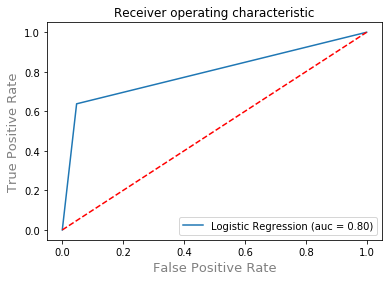

auc 0.7954361054766733


In [24]:
Classification_Assessment(CV_rfc ,X_train, y_train, X_test, y_test, y_pred_RFC)

Without a doubt, the new CatBoostClassifier model works better (faster and more accurately) than the highly optimized RandomForestClassifier.